# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [125]:
%matplotlib notebook

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
research_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
research_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [127]:
# Checking the number of mice.
mouse_count = len(research_data_complete["Mouse ID"].unique())
mouse_count

249

In [128]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = research_data_complete.loc[research_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [129]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = research_data_complete.loc[research_data_complete['Mouse ID']=='g989', :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [130]:
clean_mice_data = research_data_complete[research_data_complete["Mouse ID"]!="g989"]
clean_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [131]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(merge_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [132]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mice_data['Tumor Volume (mm3)'].groupby(clean_mice_data['Drug Regimen']).mean()
median = clean_mice_data['Tumor Volume (mm3)'].groupby(clean_mice_data['Drug Regimen']).median()
variance = clean_mice_data['Tumor Volume (mm3)'].groupby(clean_mice_data['Drug Regimen']).var()
standard_deviation = clean_mice_data['Tumor Volume (mm3)'].groupby(clean_mice_data['Drug Regimen']).std()
sem = clean_mice_data['Tumor Volume (mm3)'].groupby(clean_mice_data['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                             "Median Tumor Volume": median,
                             "Tumor Volume Variance": variance,
                             "Tumor Volume Std. Dev.": standard_deviation,
                             "Tumor Volume Std. Err.": sem})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
stats = ('mean', 'median', 'var', 'std', 'sem')
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_mice_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [134]:
mice_count = clean_mice_data['Drug Regimen'].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


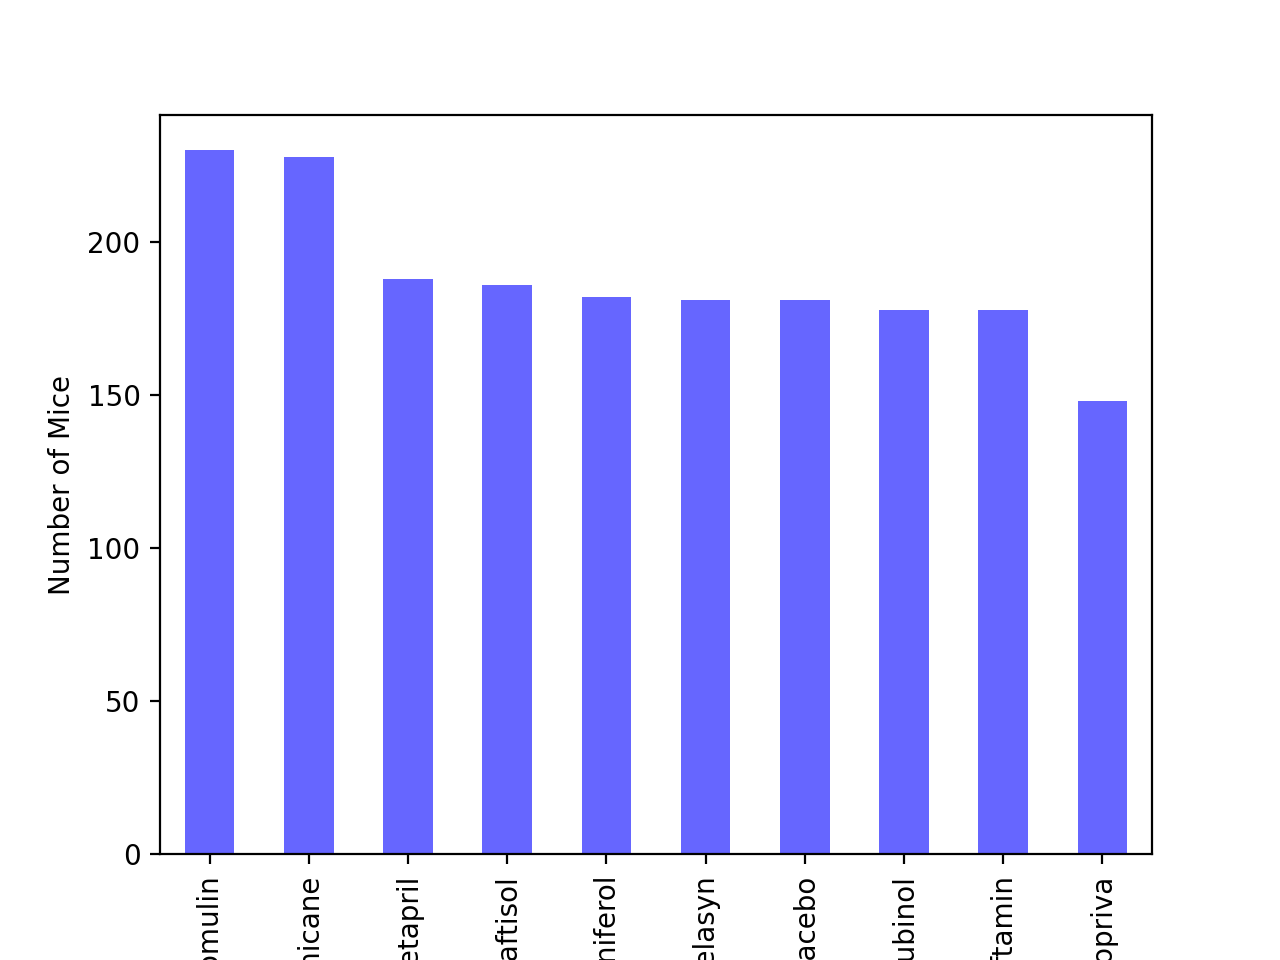

Text(0, 0.5, 'Number of Mice')

In [138]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = mice_count.plot.bar(color='b', alpha=0.6, align='center')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

<IPython.core.display.Javascript object>


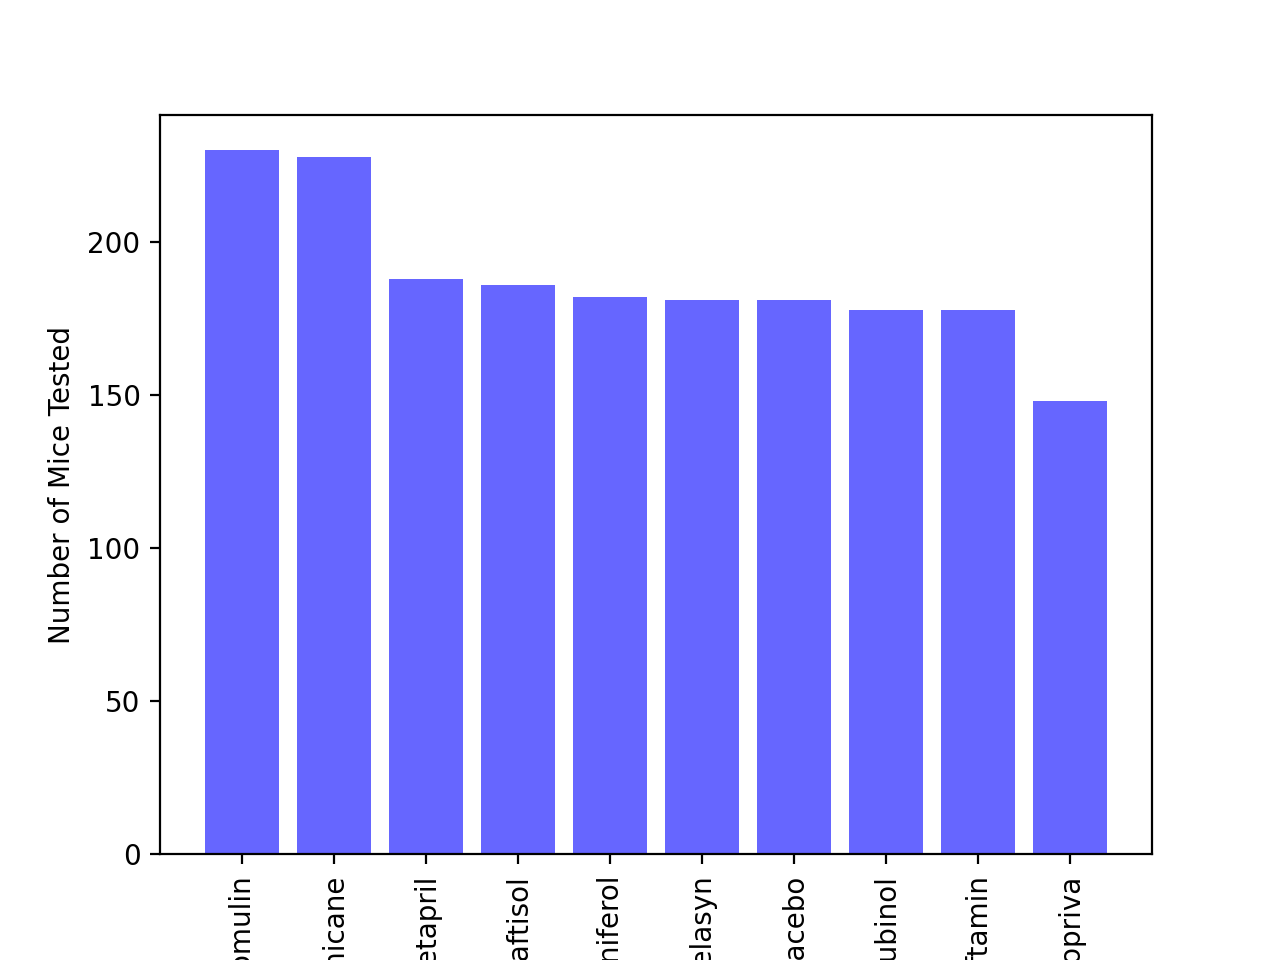

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

In [139]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.6, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation="vertical")

<IPython.core.display.Javascript object>


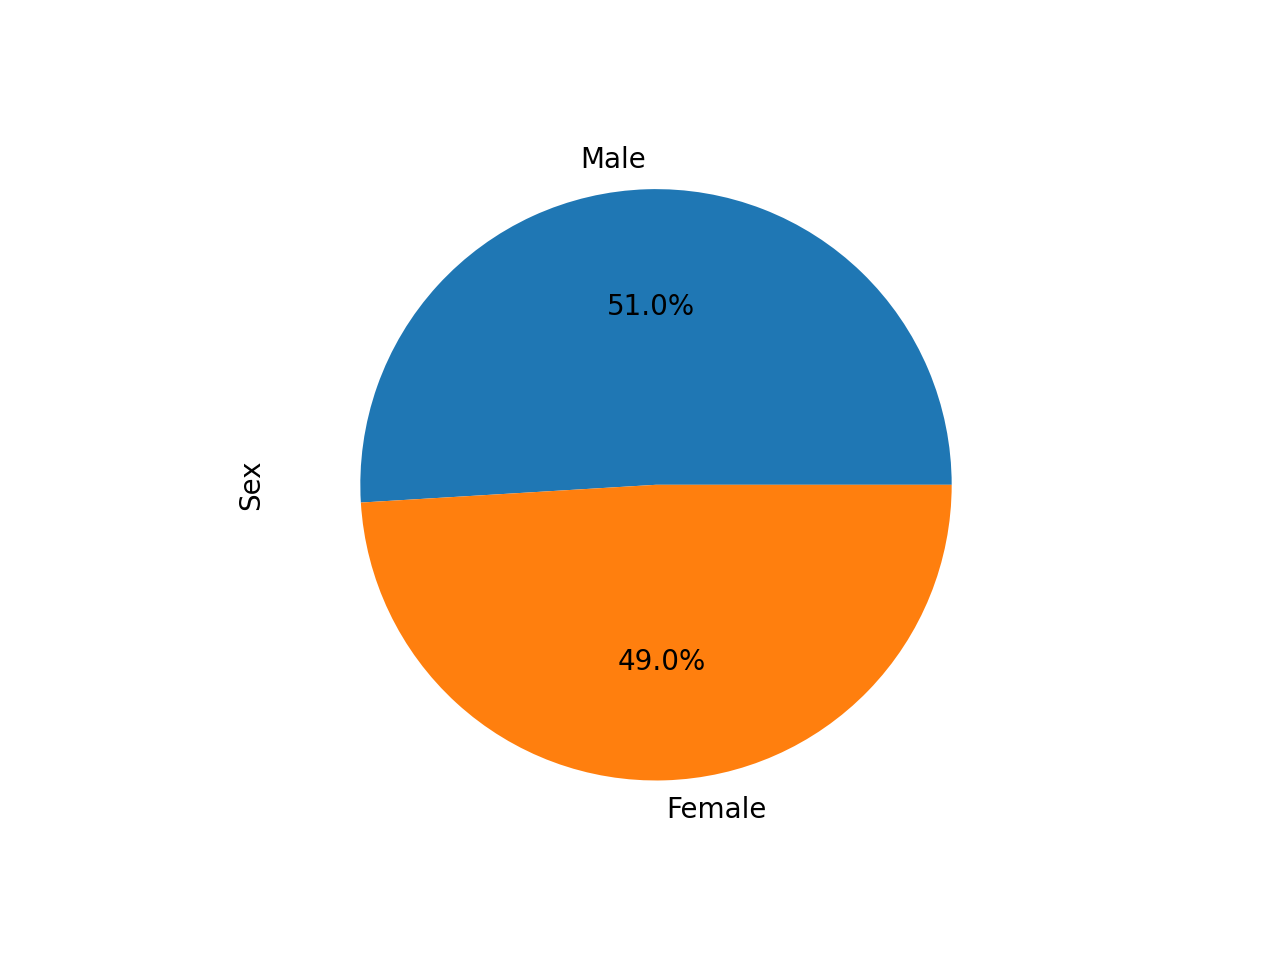

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mice_data['Sex'].value_counts()
gender_data.plot.pie(autopct = "%1.1f%%")
plt.show()

<IPython.core.display.Javascript object>


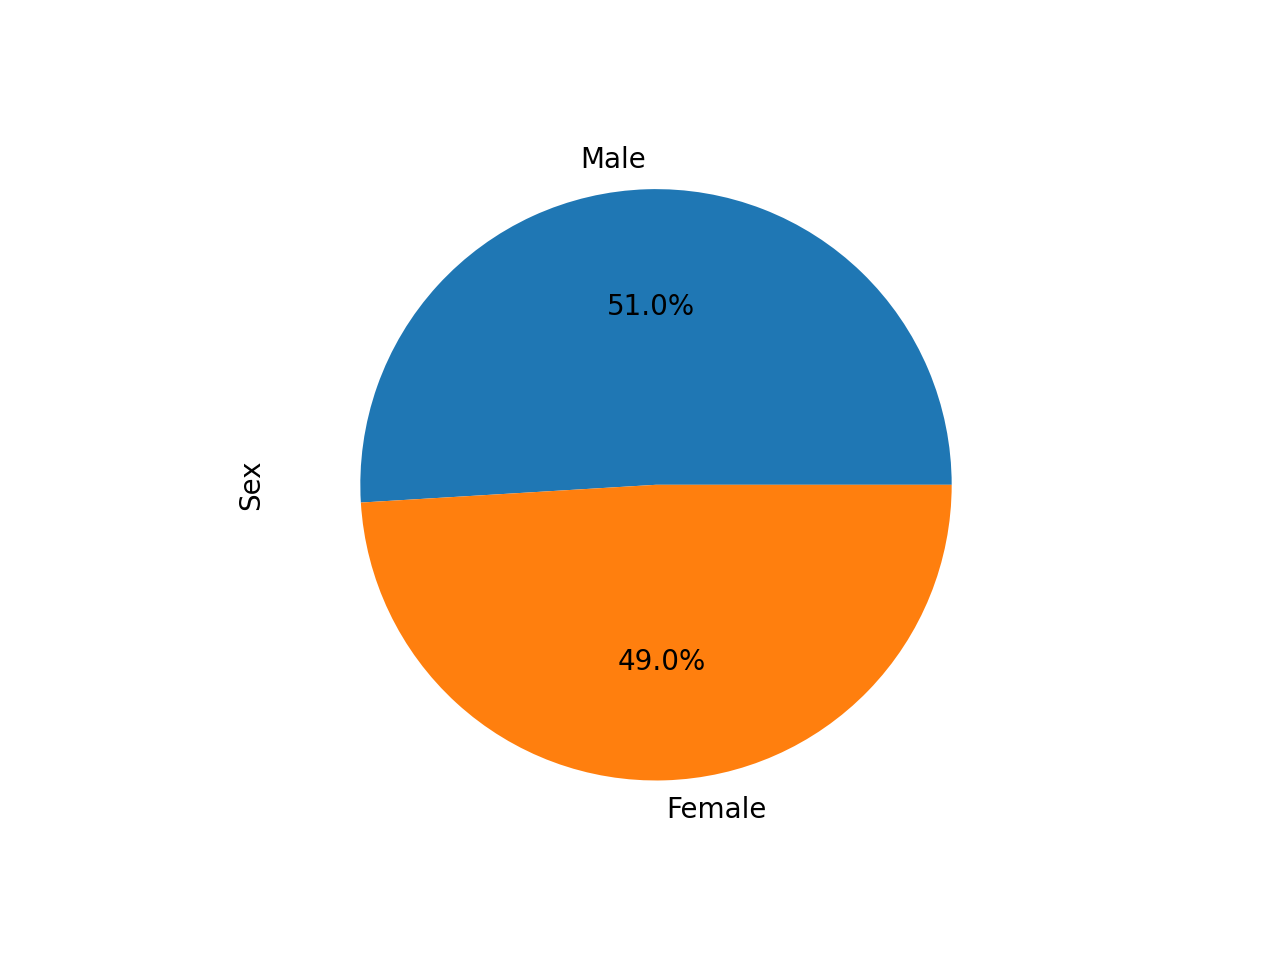

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [50.6, 49.4]
plot = gender_data.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
greatest_timepoint = clean_mice_data.groupby("Mouse ID")

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = greatest_timepoint["Timepoint"].max()
greatest_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_timepoint_df, clean_mice_data, on = ["Mouse ID","Timepoint"])
tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [143]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print (f"----------------------------------------------------")

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 coul

<IPython.core.display.Javascript object>


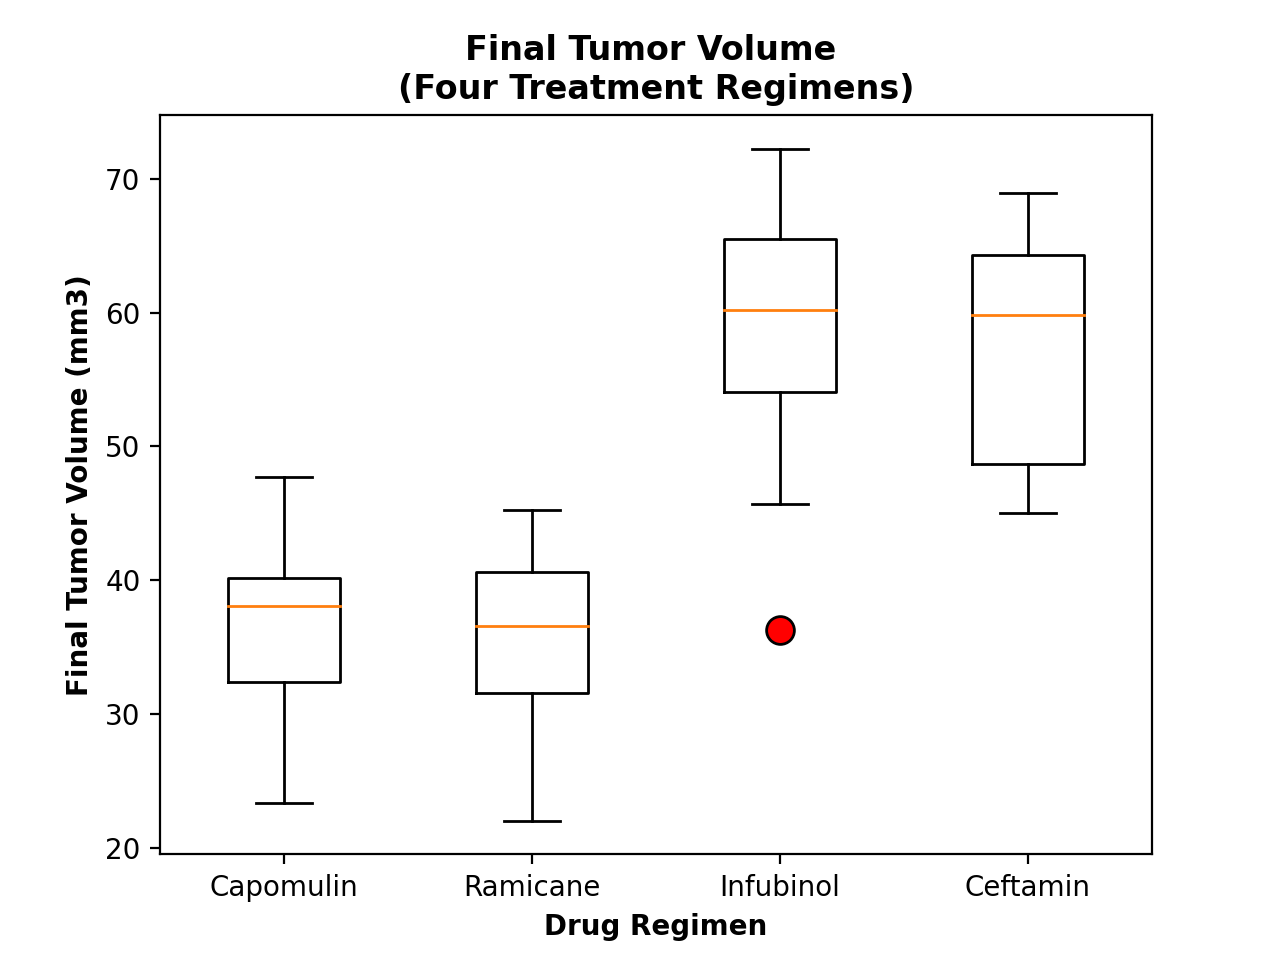

In [144]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


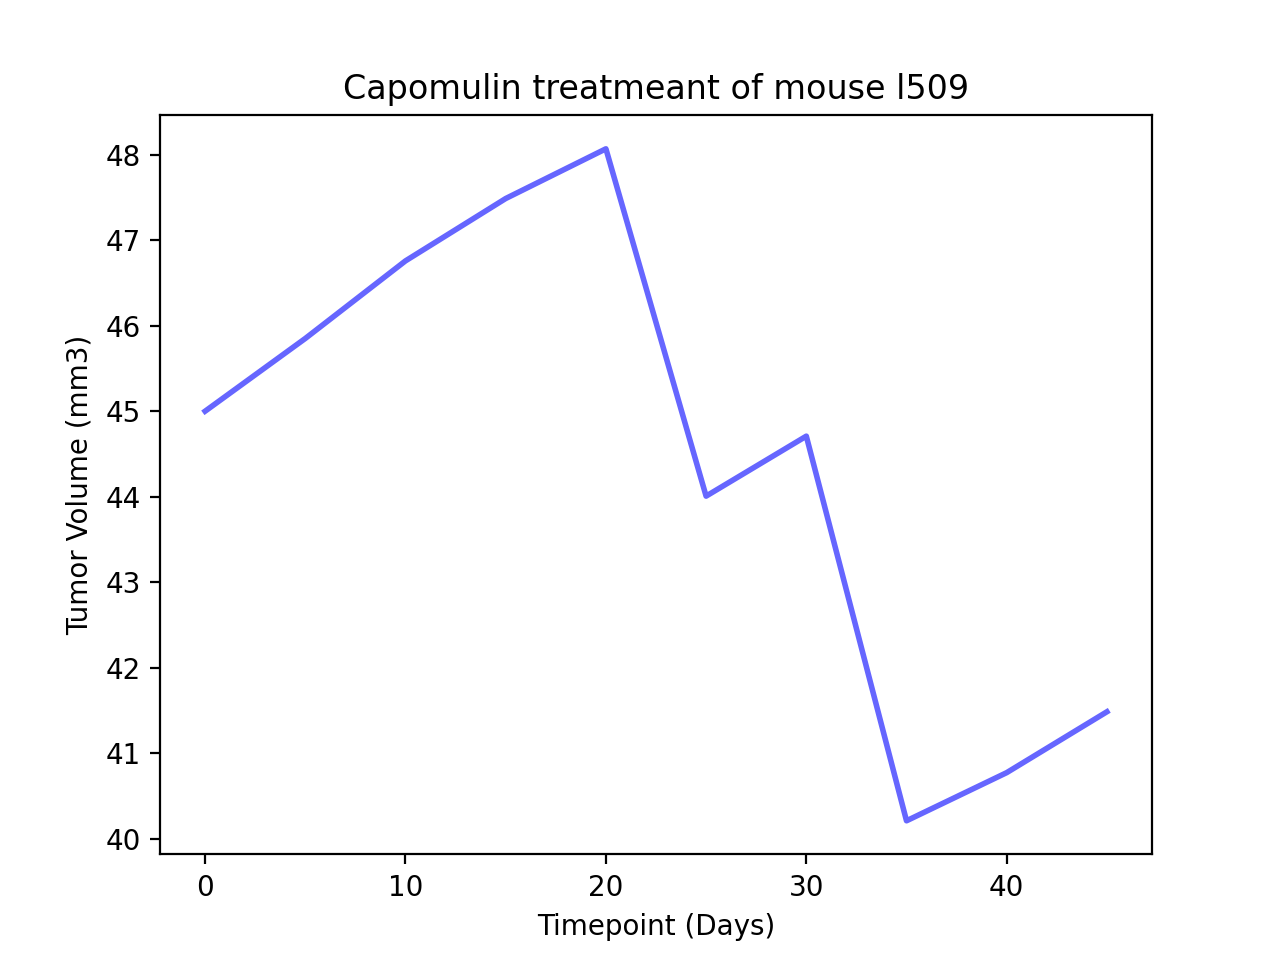

Text(0, 0.5, 'Tumor Volume (mm3)')

In [145]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_graph = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_graph["Timepoint"]
y_axis = line_graph["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, linewidth=2, color="blue", alpha=0.6)
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

<IPython.core.display.Javascript object>


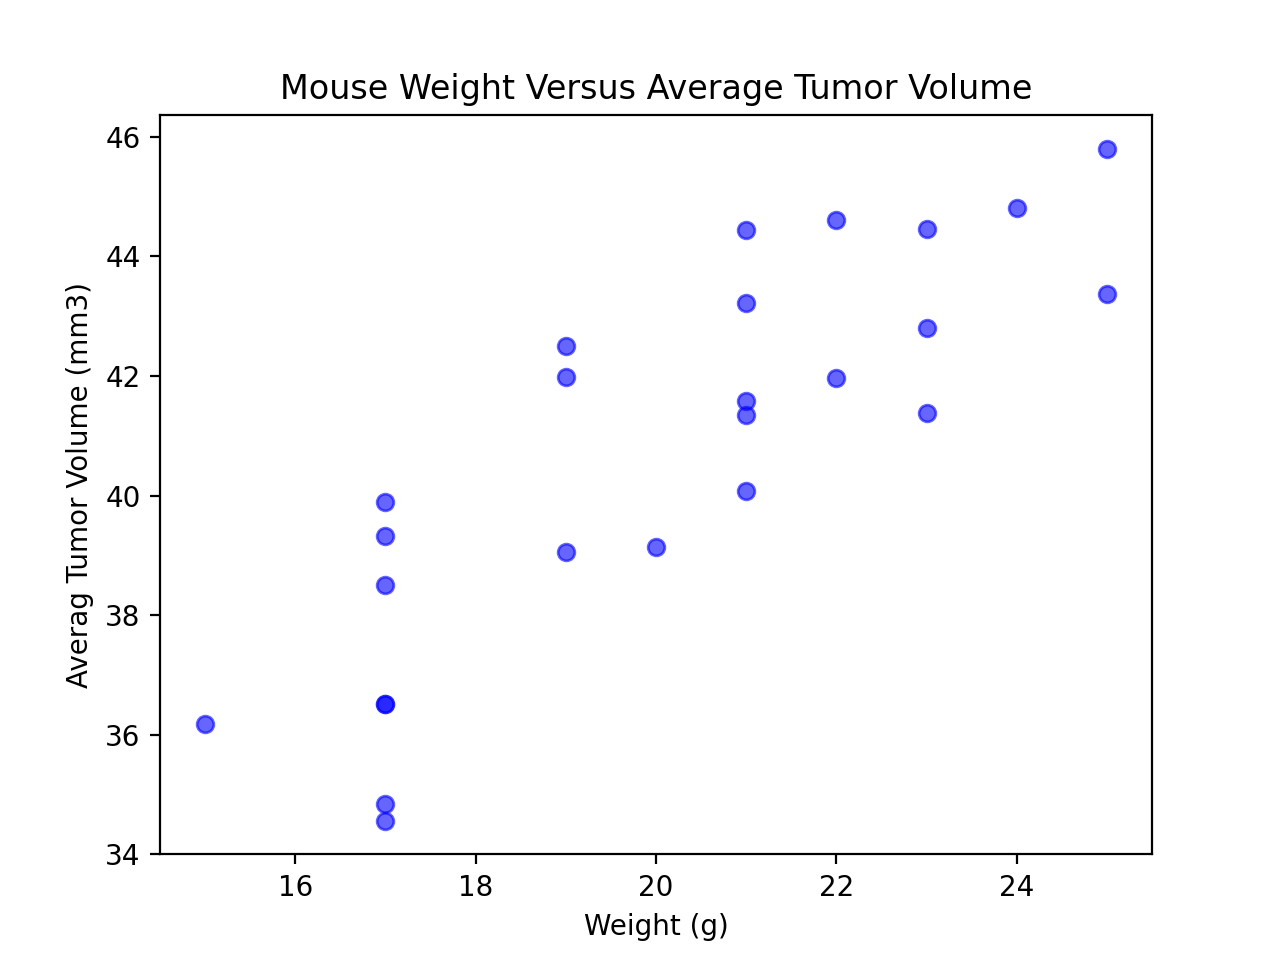

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

In [146]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin_vol = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'], color="blue", alpha=0.6)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


<IPython.core.display.Javascript object>


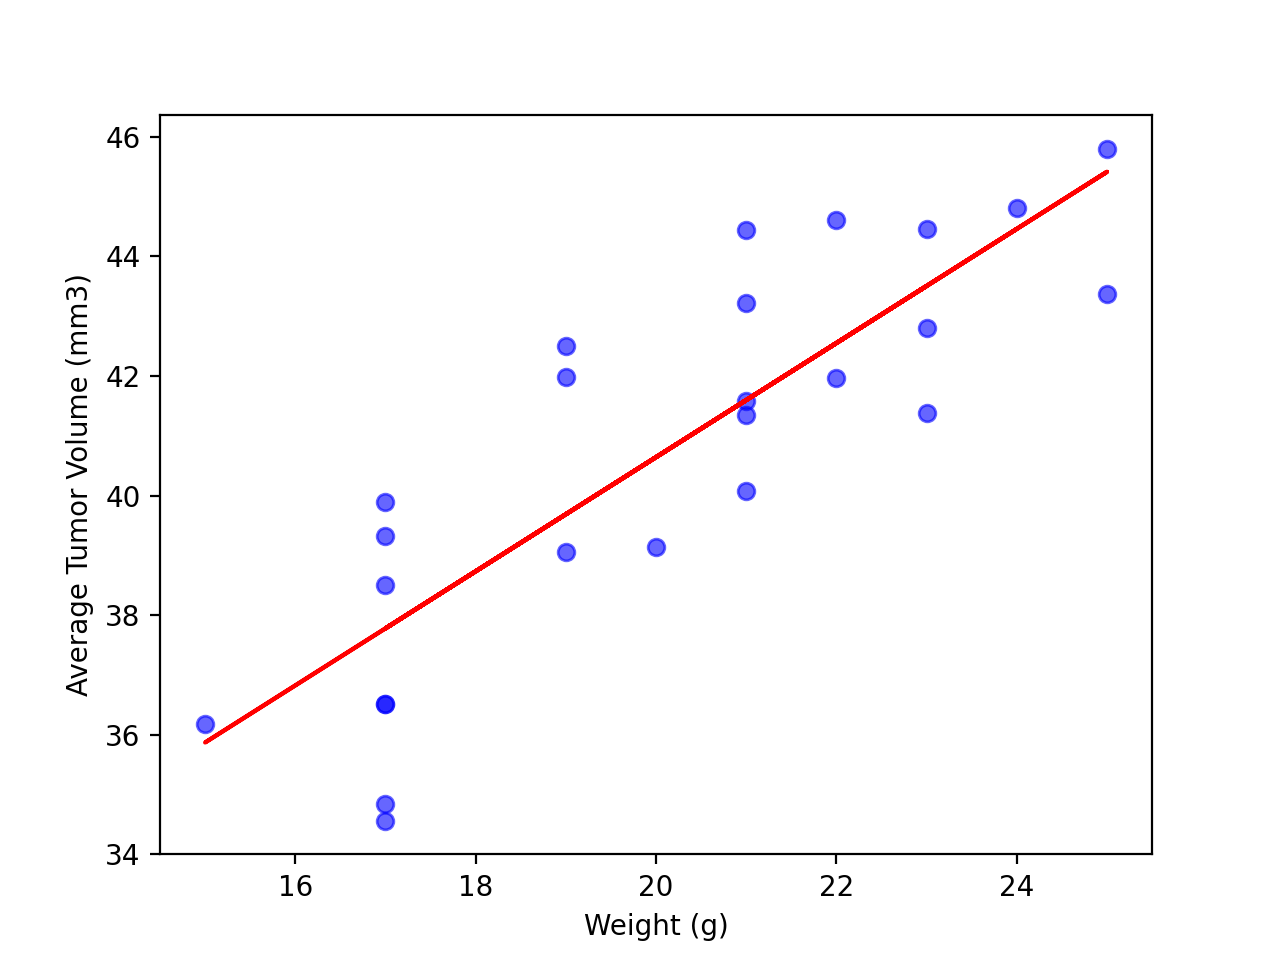

Text(0, 0.5, 'Average Tumor Volume (mm3)')

In [156]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'], color="blue", alpha=0.6)
plt.plot(avg_capomulin_vol['Weight (g)'], regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")